## EN3160 Assignment 3 on Neural Networks
## Index No : 210349N
## Name : Madhushan I.D.
#### GitHub Link :


# Q1:  
####Listing 1 shows the code for a single dense layer network with manually computed forward path and backpropagations. Do the following changes
 #### (a) Add a middle layer with 100 nodes and a sigmoid activation.
 #### (b) Use cross-entropy loss (see slide 102).
 #### (c) Run the network for 10 epochs nad report the taining and test accuracies.

## Model Architecture:
###Input Layer:
- Accepts CIFAR-10 images flattened to a vector of size 3072 (3 × 32 × 32 pixels).

###Hidden Layer:
- 100 nodes.
- Activation: Sigmoid.

###Output Layer:
- 10 neurons, one per class, to provide class scores for CIFAR-10 classification.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Average Loss: 2.0184
Epoch 2/10, Average Loss: 1.8605
Epoch 3/10, Average Loss: 1.8129
Epoch 4/10, Average Loss: 1.7854
Epoch 5/10, Average Loss: 1.7660
Epoch 6/10, Average Loss: 1.7515
Epoch 7/10, Average Loss: 1.7400
Epoch 8/10, Average Loss: 1.7306
Epoch 9/10, Average Loss: 1.7228
Epoch 10/10, Average Loss: 1.7161


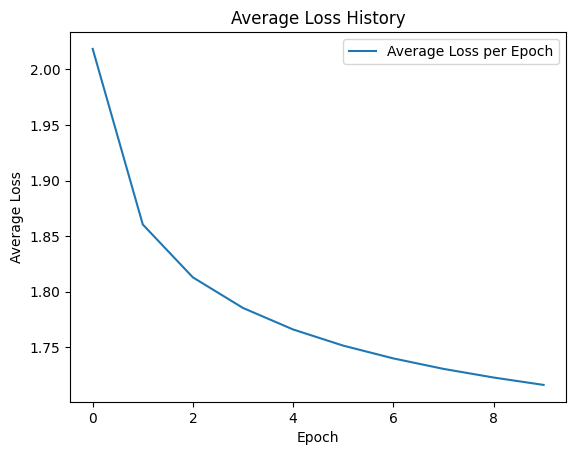

Training accuracy: 41.03%
Test accuracy: 40.18%


In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalization to [-1, 1]
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network Parameters
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

# Model Initialization
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Hidden layer size
K = 10             # Output size (number of classes in CIFAR-10)
model = MLP(Din, H, K)

# Hyperparameters
epochs = 10
lr = 0.01  # Learning rate
lr_decay = 0.9
loss_history = []

# Loss function
criterion = nn.CrossEntropyLoss()

# Xavier Initialization
w1 = torch.randn(Din, H) * (1. / torch.sqrt(torch.tensor(Din, dtype=torch.float32)))
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * (1. / torch.sqrt(torch.tensor(H, dtype=torch.float32)))
b2 = torch.zeros(K)

# Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer activation
        y_pred = hidden.mm(w2) + b2                  # Output layer activation

        # Loss calculation
        loss = criterion(y_pred, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = torch.softmax(y_pred, dim=1) - nn.functional.one_hot(labels, K).float()
        dw2 = hidden.t().mm(dy_pred) / Ntr
        db2 = dy_pred.sum(dim=0) / Ntr

        dhidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)
        dw1 = x_train.t().mm(dhidden) / Ntr
        db1 = dhidden.sum(dim=0) / Ntr

        # Parameter updates
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Learning rate decay
    lr *= lr_decay

    print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {running_loss / len(trainloader):.4f}")

# 3. Plotting the Loss History
average_loss = [sum(loss_history[i:i+len(trainloader)]) / len(trainloader) for i in range(0, len(loss_history), len(trainloader))]
plt.plot(average_loss, label='Average Loss per Epoch')
plt.title("Average Loss History")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.legend()
plt.show()

# 4. Calculate Accuracy on Training Set
def calculate_accuracy(loader, w1, b1, w2, b2):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)

            hidden = torch.sigmoid(x_train.mm(w1) + b1)
            y_train_pred = hidden.mm(w2) + b2
            predicted_train = torch.argmax(y_train_pred, dim=1)
            total += labels.size(0)
            correct += (predicted_train == labels).sum().item()
    return 100 * correct / total

train_acc = calculate_accuracy(trainloader, w1, b1, w2, b2)
print(f"Training accuracy: {train_acc:.2f}%")

# 5. Calculate Accuracy on Test Set
test_acc = calculate_accuracy(testloader, w1, b1, w2, b2)
print(f"Test accuracy: {test_acc:.2f}%")


# Q2: Create a LeNet-5 network for MNIST using Pytorch. Report the training and test accuracies after 10 epochs.

## Step 1: Import Necessary Libraries, Load and Normalize MNIST Dataset

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Load and Normalize MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64

trainset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)


## Step 2: Define the LeNet-5 Model Architecture

In [18]:
# 2. Define LeNet-5 Architecture
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the network
model = LeNet5()

##Step 3: Define Loss Function and Optimizer

In [19]:
# 3. Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


## Step 5: Train the Network

Epoch 1/10, Loss: 0.4799
Epoch 2/10, Loss: 0.0934
Epoch 3/10, Loss: 0.0640
Epoch 4/10, Loss: 0.0490
Epoch 5/10, Loss: 0.0401
Epoch 6/10, Loss: 0.0337
Epoch 7/10, Loss: 0.0288
Epoch 8/10, Loss: 0.0261
Epoch 9/10, Loss: 0.0216
Epoch 10/10, Loss: 0.0192


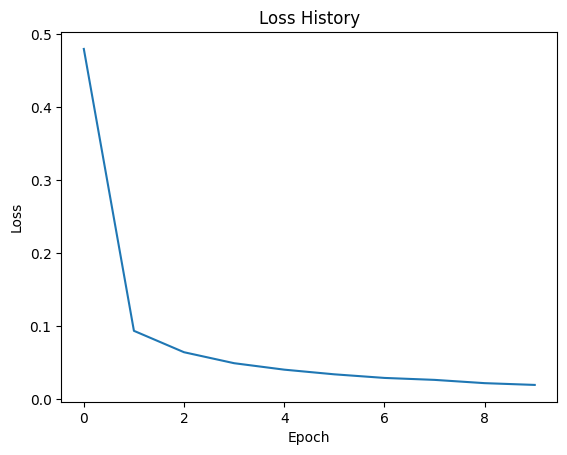

In [20]:
# 4. Train the Network
epochs = 10
train_losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# Plot the loss history
plt.plot(train_losses)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Step 6: Evaluate Accuracy on Training and Test Sets

In [21]:
# 5. Evaluate Accuracy on Training and Test Sets
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_accuracy = calculate_accuracy(trainloader, model)
test_accuracy = calculate_accuracy(testloader, model)

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 99.39%
Test Accuracy: 98.77%


# Q3:
###Based on the PyTorch tutorial on transfer learning get the pre-trained ResNet18 network trained on ImageNet1K. classify hymenoptera dataset by
#### (a) fine tuning, and
#### (b) using the network as a feature extracter.
####Reort the results.

## 1. Download and extract dataset

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os
import time
import zipfile
import urllib.request
from tempfile import TemporaryDirectory

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if not os.path.exists('data/hymenoptera_data'):
    print("Downloading dataset...")
    url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
    urllib.request.urlretrieve(url, "hymenoptera_data.zip")
    with zipfile.ZipFile("hymenoptera_data.zip", 'r') as zip_ref:
        zip_ref.extractall("data")
    print("Dataset downloaded and extracted.")

## Data preparation, Data augmentation and normalization for training; normalization for validation

In [24]:

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

## 2. Function to train the model

In [28]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    with TemporaryDirectory() as tempdir:
        best_model_path = os.path.join(tempdir, 'best_model.pth')
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_corrects = 0

                for inputs, labels in dataloaders[phase]:
                    inputs, labels = inputs.to(device), labels.to(device)

                    optimizer.zero_grad()
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:.4f}')

        model.load_state_dict(torch.load(best_model_path))
    return model

## 3. Fine-tuning the ConvNet

In [29]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

## Train and evaluate

In [30]:
print("Training the fine-tuned model:")
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Training the fine-tuned model:
Epoch 0/9
----------
train Loss: 0.5445 Acc: 0.6885
val Loss: 0.1792 Acc: 0.9412

Epoch 1/9
----------
train Loss: 0.6355 Acc: 0.7664
val Loss: 0.3288 Acc: 0.8758

Epoch 2/9
----------
train Loss: 0.4989 Acc: 0.7992
val Loss: 0.2638 Acc: 0.8693

Epoch 3/9
----------
train Loss: 0.4686 Acc: 0.7951
val Loss: 0.2616 Acc: 0.8824

Epoch 4/9
----------
train Loss: 0.4108 Acc: 0.8279
val Loss: 0.1734 Acc: 0.9150

Epoch 5/9
----------
train Loss: 0.4477 Acc: 0.8238
val Loss: 0.1663 Acc: 0.9216

Epoch 6/9
----------
train Loss: 0.4767 Acc: 0.8443
val Loss: 0.2414 Acc: 0.8889

Epoch 7/9
----------
train Loss: 0.2968 Acc: 0.8730
val Loss: 0.2588 Acc: 0.9085

Epoch 8/9
----------
train Loss: 0.2682 Acc: 0.8934
val Loss: 0.2221 Acc: 0.9216

Epoch 9/9
----------
train Loss: 0.2979 Acc: 0.8689
val Loss: 0.1999 Acc: 0.9281

Training complete in 13m 41s
Best val Acc: 0.9412


<ipython-input-28-c4957d9574f6>:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


## 4. Using ConvNet as a fixed feature extractor

In [31]:
model_conv = models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)
model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

print("\nTraining the fixed feature extractor model:")
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)


Training the fixed feature extractor model:
Epoch 0/9
----------
train Loss: 0.6638 Acc: 0.6639
val Loss: 0.3023 Acc: 0.8693

Epoch 1/9
----------
train Loss: 0.5954 Acc: 0.7418
val Loss: 0.4450 Acc: 0.8235

Epoch 2/9
----------
train Loss: 0.5178 Acc: 0.7664
val Loss: 0.1824 Acc: 0.9477

Epoch 3/9
----------
train Loss: 0.4126 Acc: 0.7992
val Loss: 0.1941 Acc: 0.9412

Epoch 4/9
----------
train Loss: 0.5790 Acc: 0.7869
val Loss: 0.1944 Acc: 0.9281

Epoch 5/9
----------
train Loss: 0.6412 Acc: 0.7664
val Loss: 0.1525 Acc: 0.9608

Epoch 6/9
----------
train Loss: 0.8046 Acc: 0.6967
val Loss: 0.2072 Acc: 0.9412

Epoch 7/9
----------
train Loss: 0.3643 Acc: 0.8402
val Loss: 0.1863 Acc: 0.9477

Epoch 8/9
----------
train Loss: 0.3123 Acc: 0.8852
val Loss: 0.1903 Acc: 0.9412

Epoch 9/9
----------
train Loss: 0.3888 Acc: 0.8361
val Loss: 0.2162 Acc: 0.9477

Training complete in 6m 32s
Best val Acc: 0.9608


<ipython-input-28-c4957d9574f6>:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


In [33]:
# Report the results after training the models
def report_results(model, dataloaders, dataset_sizes, description):
    model.eval()
    running_corrects = 0
    running_loss = 0.0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    loss = running_loss / dataset_sizes['val']
    accuracy = running_corrects.double() / dataset_sizes['val']

    print(f"\nResults for {description}:")
    print(f"Validation Loss: {loss:.4f}")
    print(f"Validation Accuracy: {accuracy:.4f}")

# Report results for fine-tuned model
report_results(model_ft, dataloaders, dataset_sizes, "Fine-Tuned ResNet18")

# Report results for feature extractor model
report_results(model_conv, dataloaders, dataset_sizes, "ResNet18 as Feature Extractor")



Results for Fine-Tuned ResNet18:
Validation Loss: 0.1792
Validation Accuracy: 0.9412

Results for ResNet18 as Feature Extractor:
Validation Loss: 0.1525
Validation Accuracy: 0.9608


## Results:
### - The validation loss for the fine-tuned ResNet18 model is 0.1792, and the validation accuracy is 94.12%.

### - The validation loss for the ResNet18 used as a feature extractor is 0.1525, with a validation accuracy of 96.08%.

### - Comparing both models:
- The feature extractor model slightly outperforms the fine-tuned model in terms of both validation loss and accuracy.
- This suggests that the pre-trained features of ResNet18 were well-suited for the hymenoptera dataset.
